####  <b><font color='red'> Exercise 1.1</font> </b> :



We know that any quantum 1 qubit quantum state can be written as : $\mathbf{|{\psi}\rangle} = \alpha|{0}\rangle + \beta|{1}\rangle $,  where $\mathbf{\alpha^2} + \mathbf{\beta^2} = 1$ 

Complete a below function $i.e.$, 'normalized_vector' which will give the updated  alpha($\mathbf{\alpha'}$) and updated beta($\mathbf{\beta'}$) values such what $\mathbf{\alpha'^2} + \mathbf{\beta'^2} = 1$ because given $\mathbf{\alpha^2} + \mathbf{\beta^2} \neq 1$




In [1]:
import random # random is a Python library that generates random numbers
import numpy as np


def normalize_vector(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """
    print(alpha, beta)
    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1
    
    alpha_modified =  alpha/ np.sqrt((np.linalg.norm(alpha)**2 + np.linalg.norm(beta)**2))        # Write the code 
    beta_modified =   beta/ np.sqrt((np.linalg.norm(alpha)**2 + np.linalg.norm(beta)**2))       # write a code
    # RETURN A VECTOR
    
    return np.array([alpha_modified, beta_modified])

a_random = complex(random.uniform(-10, 10), random.uniform(-10, 10))
b_random  = complex(random.uniform(-10, 10), random.uniform(-10, 10))
a1, b1 = normalize_vector(a_random, b_random)

if not np.isclose(np.linalg.norm([a1, b1]), 1):
    raise ValueError(f"Normalization failed: {a1, b1}") # This will raise an error if the normalization failed

(8.749974447170693+0.8823795509030674j) (1.051962374533609+5.532775315366985j)


#### <b><font color='red'>Exercise 1.2</font></b>:



Recall that quantum operations are represented as matrices. To preserve normalization, they must be a special type of matrix called a unitary matrix. For some complex-valued unitary matrix the state of the qubit after an operation is
<div style="text-align: center;">

$ |{\psi'}\rangle = U|{\psi}\rangle$
    
</div>


Let's simulate the process by completing the function *apply_unitary* below to apply the provided quantum operation $U$ to an input **state**.

Complete a below function $i.e.$, **apply_unitary** which will give the updated  quantum state afcter apply the given unitary.





In [4]:
import numpy as np

def create_random_uni():
    random_matrix = np.random.rand(2, 2) + 1j * np.random.rand(2, 2)
    Q, R = np.linalg.qr(random_matrix)

    return Q

def create_randon_state():
    z1 = np.random.rand() + 1j * np.random.rand()
    z2 = np.sqrt(1 - np.abs(z1)**2) * np.exp(1j * np.angle(z1) + 1j * np.pi/2)  # Add pi/2 to ensure orthogonality
    return np.array([z1, z2])



U = create_random_uni()


def apply_unitary(old_state,U_matrix):
    """Apply a quantum operation.

    Args:
        old_state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U_matrix.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    new_state = U_matrix@old_state## Write your code here
    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    return new_state
# create random state

state = create_randon_state()
new_state = apply_unitary(state, U)

# ## check the new state is normalized
if not np.isclose(np.linalg.norm(new_state), 1):
    raise ValueError(f"Normalization failed: {new_state}") # This will raise an error if the normalization failed
else:
    print(f"New state: {new_state}")

New state: [-0.53158729-0.44673112j  0.47606549-0.53963683j]


#### <b><font color='red'>Exercise 1.4</font></b>:



Write an function with the help of pennylane for the below circuit <br> <br>

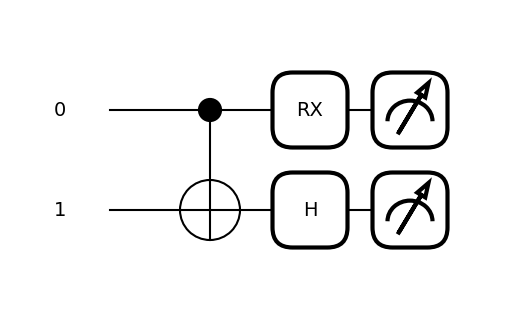

Reference : Checkout the qml module as it is the top level module from which all basic functions and classes of PennyLane can be directly imported.<br>


[👉 👉 Click here for reference ✋](https://docs.pennylane.ai/en/stable/code/qml.html)



(<Figure size 500x300 with 1 Axes>, <Axes: >)

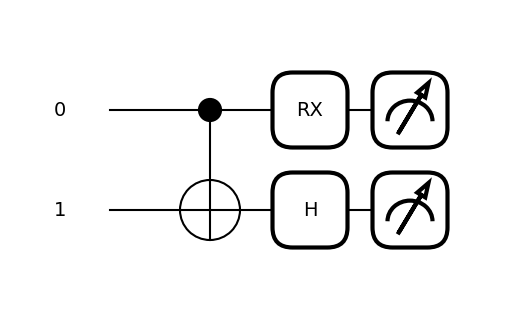

In [1]:
import pennylane as qml # Importing the PennyLane library
import numpy as np  # Importing the NumPy library


theta = [0.5]

def my_first_circuit(theta):


    ##################
    # YOUR CODE HERE #
    ##################
    
    #####
    qml.CNOT(wires=[0,1])
    qml.RX(theta[0], wires=0)
    qml.Hadamard(wires=1)

    return qml.probs(wires = [0,1])

# Check the output of the function for a particular input
dev = qml.device('default.qubit', wires=[0,1])
my = qml.QNode(my_first_circuit, dev)
qml.draw_mpl(my)(theta)


#### <b><font color='red'>Exercise 1.5</font></b>:




<div class="blue">

Write an function with the help of pennylane for the below circuit where meaasurement will done in PauliY basis in qubit 1 and X measurement will be done in qubit 2. 


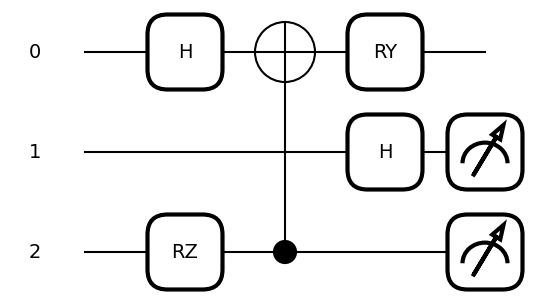


[👉 👉 Click here for reference ✋](https://docs.pennylane.ai/en/stable/introduction/measurements.html)




[0.25 0.25 0.25 0.25]


(<Figure size 600x400 with 1 Axes>, <Axes: >)

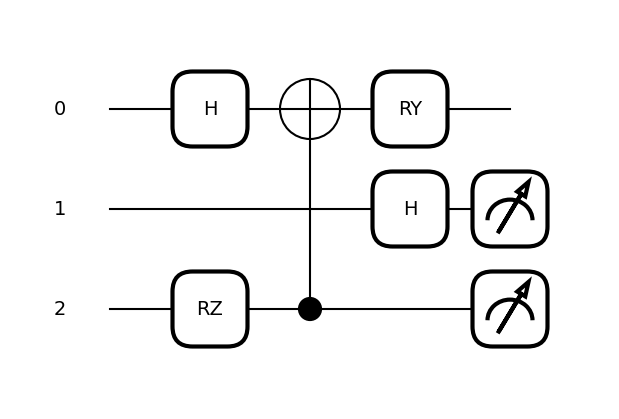

In [7]:
import pennylane as qml
dev = qml.device("default.qubit", wires=[0,1,2])

@qml.qnode(dev)
# U1 = qml.PauliX(0) @ qml.PauliX(1)

# obs = [qml.Hadamard(1) @ qml.Hadamard(2)]
# 
def test_circuit(theta1, theta2):
   
    ## Write for code for the circuit
    ## Applu theta1 on RY(0) and theta2 on RZ(1)
    qml.Hadamard(wires=0)
    qml.RZ(theta2, wires=2)
    qml.CNOT(wires=[2,0])
    qml.Hadamard(wires=1)
    qml.RY(theta1, wires=0)

    return qml.probs(op=qml.PauliY(1)@qml.PauliY(2))             #  Hint:  op = pauli_op1 @ paili_op2 with their corresponding wire

# op=qml.Hadamard
t1 = 0.5
t2 = 0.4


print(test_circuit(t1, t2))
qml.draw_mpl(test_circuit)(t1,t2)